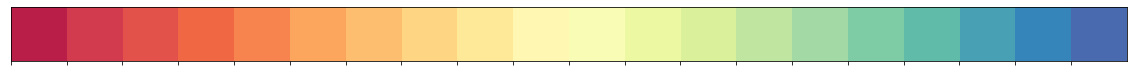

In [3]:
import pandas as pd
import numpy as np
import scipy 
import seaborn as sns
from matplotlib import pyplot as plt
import re
from matplotlib.ticker import MaxNLocator


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

pal = sns.color_palette("Spectral", 20)
customPalette = pal.as_hex()
sns.set_palette(customPalette)
sns.palplot(customPalette)

In [4]:
analysis = '/work/projects/ecosystem_biology/archaea/coevolution/analysis'
pics = '/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/pics'

# <center>Import mmseqs2 clusters<center>

In [5]:
repres_ak = pd.read_csv(analysis+'/mmseqs2/archaea_all_known/clustering_0.9seqid_0.9c.tsv',
           sep='\t', header=None, names=['rpr', 'protein'])

repres_ak['rpr'].unique().shape

(3027810,)

Create the cluster id column:

In [6]:
repres_ak.rpr = pd.Categorical(repres_ak.rpr)
repres_ak['cluster'] = repres_ak.rpr.cat.codes
repres_ak.head()

rpr             protein  cluster
0  3300025854_5_693    3300025854_5_693  1477427
1  3300025854_5_693  3300009029_24_1147  1477427
2  3300025854_5_693   3300025600_31_120  1477427
3  3300025854_5_821    3300025854_5_821  1477457
4  3300025854_5_821  3300025836_26_1471  1477457

count how many proteins are in clusters and plot:

In [7]:
clusters_ak = repres_ak[['cluster',  'protein']].sort_values('cluster')

cluster_counts_ak = clusters_ak.groupby('cluster', as_index=False).agg({'protein':'count'})\
.rename(columns={'protein':'count'})\
.sort_values('count', ascending=False)

In [17]:
cluster_counts_ak[cluster_counts_ak['count']>2]

cluster  count
419988    419988   1009
2833856  2833856    985
2949158  2949158    985
594286    594286    984
2787167  2787167    976
...          ...    ...
1125930  1125930      3
2916240  2916240      3
1869781  1869781      3
629134    629134      3
1095824  1095824      3

[456514 rows x 2 columns]

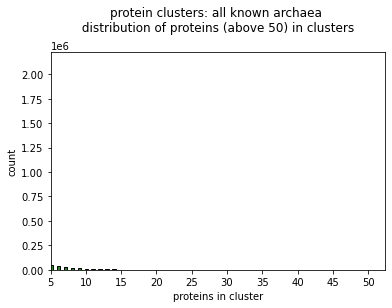

In [15]:
plt.hist(cluster_counts_ak[(cluster_counts_ak['count']<=50)]['count'], color = 'forestgreen', edgecolor = 'black',
         bins = 100)

plt.title('protein clusters: all known archaea \n distribution of proteins (above 50) in clusters \n')
plt.xlabel('proteins in cluster')
plt.ylabel('count')
plt.xlim(left=5)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# plt.savefig(pics+'/protein_clusters_AK_>50.png', quality = 95, dpi = 200)

plt.show()